<a href="https://colab.research.google.com/github/vigneshpatel14/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train.shape , y_test.shape

((50000, 1), (10000, 1))

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X , y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

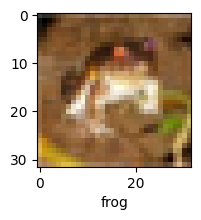

In [ ]:
plot_sample(X_train , y_train , 0)

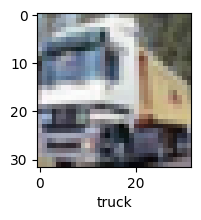

In [ ]:
plot_sample(X_train , y_train , 1)

In [ ]:
X_train = X_train / 225.0
X_test = X_test / 225.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3112 - loss: 1.9171
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4263 - loss: 1.6249
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4546 - loss: 1.5416
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4765 - loss: 1.4807
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4977 - loss: 1.4206


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.53      0.53      1000
           1       0.79      0.31      0.45      1000
           2       0.33      0.46      0.38      1000
           3       0.31      0.29      0.30      1000
           4       0.50      0.27      0.35      1000
           5       0.31      0.55      0.40      1000
           6       0.51      0.54      0.52      1000
           7       0.62      0.45      0.52      1000
           8       0.49      0.73      0.58      1000
           9       0.64      0.41      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
cnn = Sequential([
    Conv2D(filters=32 , kernel_size=(3,3) ,activation='relu' , input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3732 - loss: 1.7040
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5772 - loss: 1.2087
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6420 - loss: 1.0352
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6741 - loss: 0.9388
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6943 - loss: 0.8778
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7164 - loss: 0.8213
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7329 - loss: 0.7656
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7524 - loss: 0.7185
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7590 - loss: 0.6886
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7754 - loss: 0.6466


In [ ]:
cnn.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7039 - loss: 0.9048


[0.9026921987533569, 0.704800009727478]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.83      0.84      0.83      1000
           2       0.57      0.60      0.58      1000
           3       0.57      0.47      0.51      1000
           4       0.69      0.56      0.62      1000
           5       0.64      0.63      0.63      1000
           6       0.72      0.82      0.77      1000
           7       0.73      0.75      0.74      1000
           8       0.77      0.84      0.81      1000
           9       0.78      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
y_test[:5]

array([[6.22056657e-03, 4.26885090e-04, 1.62460085e-03, 9.05823708e-01,
        1.16731878e-03, 4.12791446e-02, 1.31330267e-02, 2.19407477e-04,
        2.97270603e-02, 3.78210563e-04],
       [5.41526079e-03, 3.61701787e-01, 9.02927331e-06, 2.65527120e-07,
        5.78563295e-08, 4.63174921e-09, 1.57971874e-06, 3.15567017e-09,
        6.32093430e-01, 7.78534333e-04],
       [1.17565736e-01, 3.63240927e-01, 1.65661576e-03, 4.14568838e-03,
        5.71896846e-04, 4.15475835e-04, 5.95092599e-04, 1.34200964e-04,
        4.91825134e-01, 1.98492259e-02],
       [8.36522698e-01, 7.74842827e-03, 5.74747398e-02, 2.06309298e-04,
        3.48522211e-03, 4.35045285e-06, 9.69994107e-06, 1.44583009e-05,
        9.44452956e-02, 8.86286653e-05],
       [2.51471029e-05, 1.44891383e-04, 5.57299750e-03, 7.40662292e-02,
        1.04598776e-01, 6.72853738e-03, 8.08777332e-01, 1.62640245e-05,
        5.45469265e-05, 1.52605498e-05]], dtype=float32)

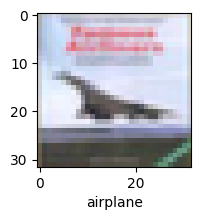

In [ ]:
plot_sample(X_test , y_test , 3)

In [ ]:
classes[y_pred_classes[3]]

'airplane'